# Продолжение по задачам классификации.

На прошлой паре мы изучили, как работают нейронные сети

А сейчас давайте немного поговорим про оценку точности моделей предсказания в **задачах Классификации**

## Матрица ошибок


Как правило, результаты решения проблемы бинарной классификации помечены как **положительные (True)** и **негативные (False)**

Эти решения могут быть
представлены в матрице ошибок (Confusion Matrix), которая содержит 4 ячейки.


• Верно-положительные (TP), объекты, которые были классифицированы как положительные и действительно являются положительными
(принадлежащими к данному классу);

• Верно-отрицательные (TN) объекты, которые были классифицированы как отрицательные и действительно отрицательные (не принадлежат к
данному классу);

• Ложно-положительные (FP) объекты, которые были классифицированы как положительные, но фактически отрицательные;

• Ложно-отрицательный (FN) объекты, которые были классифицированы как отрицательные, но фактически положительные;

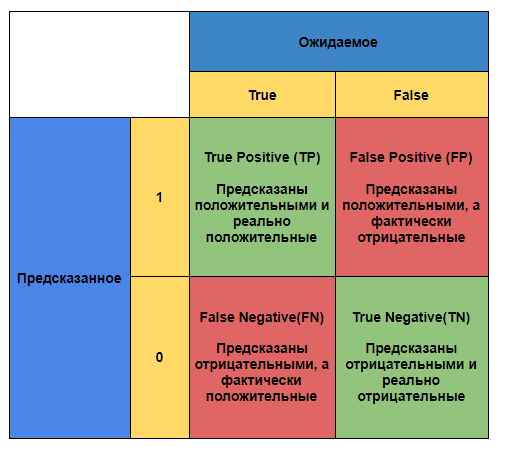

На основе матрицы ошибок и её значений, рассчитываются различные метрики в задачах классификации. 

# Метрики




## Accuracy


Accuracy классификации является самой простой метрикой из существующих.

Она определяется следующим  образом:

$Accuracy = \frac{TP + TN}{TP + TN + FP + TN} * 100$

Или

$Accuracy = \frac{N_{True}}{N_{All}} * 100$ , где

$N_{True}$ - количество правильных прогнозов

$N_{All}$ - общее количество прогнозов

Это метрика в явном виде показывает нам процент правильных прогнозов

Она хорошо себя показывает только в рамках задач классификации с одним классом (Да/Нет)

Предположим,  перед нами стоит задача мульти-классовой классификации. Нужно классифицировать, к какой из 10 профессий принадлежит человек. Допустим, что вы имеете accuracy, скажем, 80%, но при этом в рамках какого-то конкретного класса классификатор работает "из рук вон плохо", не определяя правильно даже треть работников профессии "строитель", а другие классы он распознает хорошо

Но по этой метрике мы этого не узнаем)

**А теперь давайте напишем функцию для этой метрики для нашей задачи про пациентов, где всего 1 класс (Да/Нет)**

In [ ]:
def Accuracy(Y_predict,Y_expected):
  #напишите код здесь

### Что должно примерно получиться:

In [ ]:
def Accuracy(Y_predict,Y_expected):
  N=0 #Колличество правильных предсказаний
  for i in range(Y_predict.size): #Проходимся по каждому предсказанию и сравниваем с ожидаемым результатом
    if Y_expected[i]==0 and Y_predict[i]<0.5 or Y_expected[i]==1 and Y_predict[i]>0.5:
      N+=1
  return N/Y_predict.size * 100 #Возвращаем ответ по формуле



---




## Precision


Precision - это доля TP (доля объектов, предсказанных положительно и фактически являются **положительными**) среди TP и TN (доля объектов, предсказанных **верно**)

Другими словами, precision дает нам ответ на вопрос «Из всех объектов, которые классифицированы как принадлежащие классу, сколько на самом деле принадлежит ему?»


Она определяется следующим  образом:

$Precision = \frac{TP}{TP + TN} * 100$

**А теперь давайте напишем функцию для этой метрики для нашей задачи про пациентов**

In [ ]:
def Precision(Y_predict,Y_expected):
  #напишите код здесь

### Что должно примерно получиться:

In [ ]:
def Precision(Y_predict,Y_expected):
  N_True=0 #Колличество правильных предсказаний "Да"
  N=0 #Общее количество правильных предсказаний
  for i in range(Y_predict.size): #Проходимся по каждому предсказанию и сравниваем с ожидаемым результатом
    if Y_expected[i]==0 and Y_predict[i]<0.5:
      N+=1
      if Y_expected[i]==1 and Y_predict[i]>0.5:
        N+=1
        N_True+=1
  return N_True/N * 100 #Возвращаем ответ по формуле



---




## Recall


Полнота (recall) – это доля TP (доля объектов, предсказанных положительно и фактически являются **положительными**) среди TP и FN (доля объектов, являющихся **положительными**)

То есть, полнота показывает сколько образцов из всех положительных примеров были классифицированы правильно

Чем выше значение полноты, тем
меньше положительных примеров пропущено в
классификации.

Также это метрику часто именуют  **чувствительностью (sensitivity)**



Она определяется следующим  образом:

$Precision = \frac{TP}{TP + FN} * 100$

**А теперь давайте напишем функцию для этой метрики для нашей задачи про пациентов**

In [ ]:
def Recall(Y_predict,Y_expected):
  #напишите код здесь

### Что должно примерно получиться:

In [ ]:
def Recall(Y_predict,Y_expected):
  N_True=0 #Колличество правильных предсказаний "Да"
  N=0 #Общее количество "Да"
  for i in range(Y_predict.size): #Проходимся по каждому предсказанию и сравниваем с ожидаемым результатом
    if Y_expected[i]==1 :
      N+=1
      if Y_predict[i]>0.5:
        N_True+=1
  return N_True/N * 100 #Возвращаем ответ по формуле



---




## F-мера (F1 Score)


Понятно, что чем выше точность и полнота, тем лучше. Но в реальной жизни максимальная точность и полнота не достижимы одновременно и приходится искать некий баланс. Поэтому, хотелось бы иметь некую метрику которая объединяла бы в себе информацию о точности и полноте нашего алгоритма. В этом случае нам будет проще принимать решение о том какую реализацию модели в итоге использовать (у кого больше тот и круче). Именно такой метрикой является **F-мера**

F1-Мера (F1-Score) – метрика показывающая, как много случаев прогнозируется моделью правильно, и сколько истинных экземпляров модель не пропустит.

Она стремится к нулю, если точность или полнота стремится к нулю

Она определяется следующим  образом:

$F1-Score = 2 * \frac{precision * recall}{precision + recall}$


**F-мера является хорошим кандидатом на формальную метрику оценки качества классификатора. Она сводит к одному числу две других основополагающих метрики: точность и полноту. Имея в своем распоряжении подобный механизм оценки вам будет гораздо проще принять решение о том являются ли изменения в алгоритме в лучшую сторону или нет.**

**А теперь давайте напишем функцию для этой метрики для нашей задачи про пациентов**

In [ ]:
def F1_Score(Y_predict,Y_expected):
  #напишите код здесь

### Что должно примерно получиться:

In [ ]:
def F1_Score(Y_predict,Y_expected):
  prec = Precision(Y_predict,Y_expected)
  rec = Recall(Y_predict,Y_expected)
  return 2*((prec * rec)/(prec + rec))

# Ссылки для доп. ознакомления

Оценка классификатора (точность, полнота, F-мера) // Баженов URL: http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html

Метрики оценки классификаторов в задачах медицинской
диагностики // Core URL: https://core.ac.uk/download/pdf/196226627.pdf


Метрики в задачах машинного обучения // Хабр URL: https://habr.com/ru/company/ods/blog/328372/

Основные метрики задач классификации в машинном обучении // Webiomed URL: https://webiomed.ai/blog/osnovnye-metriki-zadach-klassifikatsii-v-mashinnom-obuchenii/

20 Popular Machine Learning Metrics. Part 1: Classification & Regression Evaluation Metrics // Towards Data Science URL: https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce
